In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# softmax
labels = [[0, 0, 1], [0, 1, 0]]
logits = [[2,  0.5, 6],
          [0.1, 0,  3]]
logits_scaled = tf.nn.softmax(logits)
logits_scaled2 = tf.nn.softmax(logits_scaled)


result1 = tf.nn.softmax_cross_entropy_with_logits_v2(labels=labels, logits=logits)
result2 = tf.nn.softmax_cross_entropy_with_logits_v2(
    labels=labels, logits=logits_scaled)
result3 = -tf.reduce_sum(labels*tf.log(logits_scaled), 1)


with tf.Session() as sess:
    print("scaled=", sess.run(logits_scaled))
    print("scaled2=", sess.run(logits_scaled2))  # 经过第二次的softmax后，分布概率会有变化

    print("rel1=", sess.run(result1), "\n")  # 正确的方式
    # 如果将softmax变换完的值放进去会，就相当于算第二次softmax的loss，所以会出错
    print("rel2=", sess.run(result2), "\n")
    print("rel3=", sess.run(result3))


# 标签总概率为1
labels = [[0.4, 0.1, 0.5], [0.3, 0.6, 0.1]]
result4 = tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits)
with tf.Session() as sess:
    print("rel4=", sess.run(result4), "\n")

# sparse
labels = [2, 1]  # 其实是0 1 2 三个类。等价 第一行 001 第二行 010
result5 = tf.nn.sparse_softmax_cross_entropy_with_logits(
    labels=labels, logits=logits)
with tf.Session() as sess:
    print("rel5=", sess.run(result5), "\n")

# 注意！！！这个函数的返回值并不是一个数，而是一个向量，
# 如果要求交叉熵loss，我们要对向量求均值，
# 就是对向量再做一步tf.reduce_sum操作
loss = tf.reduce_sum(result1)
with tf.Session() as sess:
    print("loss=", sess.run(loss))

labels = [[0, 0, 1], [0, 1, 0]]
loss2 = -tf.reduce_sum(labels * tf.log(logits_scaled))
with tf.Session() as sess:
    print("loss2=", sess.run(loss2))

scaled= [[0.01791432 0.00399722 0.97808844]
 [0.04980332 0.04506391 0.90513283]]
scaled2= [[0.21747023 0.21446465 0.56806517]
 [0.2300214  0.22893383 0.5410447 ]]
rel1= [0.02215516 3.0996735 ] 

rel2= [0.56551915 1.4743223 ] 

rel3= [0.02215518 3.0996735 ]
rel4= [2.1721554 2.7696736] 

rel5= [0.02215516 3.0996735 ] 

loss= 3.1218286
loss2= 3.1218288


Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
输入数据: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
输入数据打shape: (55000, 784)


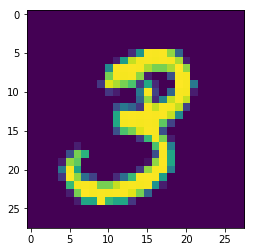

输入数据打shape: (10000, 784)
输入数据打shape: (5000, 784)
Epoch: 0001 cost= 8.382668430
Epoch: 0002 cost= 4.464316230
Epoch: 0003 cost= 3.126034678
Epoch: 0004 cost= 2.488456380
Epoch: 0005 cost= 2.117256206
Epoch: 0006 cost= 1.872246565
Epoch: 0007 cost= 1.697908393
Epoch: 0008 cost= 1.566228652
Epoch: 0009 cost= 1.463108710
Epoch: 0010 cost= 1.379796264
Epoch: 0011 cost= 1.310698166
Epoch: 0012 cost= 1.252372600
Epoch: 0013 cost= 1.202280560
Epoch: 0014 cost= 1.158756600
Epoch: 0015 cost= 1.120371513
Epoch: 0016 cost= 1.086222033
Epoch: 0017 cost= 1.055665097
Epoch: 0018 cost= 1.028173959
Epoch: 0019 cost= 1.003075219
Epoch: 0020 cost= 0.980055359
Epoch: 0021 cost= 0.958943647
Epoch: 0022 cost= 0.939451212
Epoch: 0023 cost= 0.921281921
Epoch: 0024 cost= 0.904460538
Epoch: 0025 cost= 0.888698173
 Finished!


In [6]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")

print('输入数据:', mnist.train.images)
print('输入数据打shape:', mnist.train.images.shape)

import pylab
im = mnist.train.images[1]
im = im.reshape(-1, 28)
pylab.imshow(im)
pylab.show()


print('输入数据打shape:', mnist.test.images.shape)
print('输入数据打shape:', mnist.validation.images.shape)


import tensorflow as tf  # 导入tensorflow库

tf.reset_default_graph()
# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784])  # mnist data维度 28*28=784
y = tf.placeholder(tf.int32, [None])  # 0-9 数字=> 10 classes

# Set model weights
W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.zeros([10]))

z = tf.matmul(x, W) + b
# 构建模型
pred = tf.nn.softmax(z)  # Softmax分类

# Minimize error using cross entropy
#cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
cost = tf.reduce_mean(
    tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=z))
# 参数设置
learning_rate = 0.01
# 使用梯度下降优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

training_epochs = 25
batch_size = 100
display_step = 1


# 启动session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())  # Initializing OP

    # 启动循环开始训练
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # 遍历全部数据集
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,
                                                          y: batch_ys})
            # Compute average loss
            avg_cost += c / total_batch
        # 显示训练中的详细信息
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1),
                  "cost=", "{:.9f}".format(avg_cost))

    print(" Finished!")